In [1]:
import time
import sys
import os
path_project = "\\".join(os.getcwd().split("\\")[:-1])
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, path_project)

from hardware.hardwaremanager import HardwareManager
from hardware import config as hcf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
hm = HardwareManager()
hm.add_default_hardware()

VDI Sythesizer Serail Port Open
Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 192.168.1.26
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0


In [3]:
from measurement.timesweep import TimeSweep
from measurement.task_base import JobManager

In [4]:
task_ts = TimeSweep()

In [5]:
task_ts.set_paraset(
    rate_refresh=10.0,
    # --------------------
    laser_current=30.0,  # percentage
    mw_freq=398.550,  # GHz
    mw_powervolt=5.0,  # voltage 0.0 to 5.0
    mw_phasevolt=0.0,  # voltage 0.0 to 5.0
    amp_input=1000,  # input amplitude for digitizer
    bgextend_size=256,  # TODO: why 256? is it a fixed number?
    # -------------------
    init_nslaser=50,  # [ns]
    init_isc=150,
    init_repeat=40,
    init_wait=1000.0,
    t_pi_mwa=100.0,
    read_wait=300.0,
    read_laser=900.0,
    tau_begin=0.0,
    tau_end=100,
    tau_step=10.0,  # [ns]
)

In [6]:
# task_ts._setup_exp()
# task_ts._shutdown_exp()

In [7]:
time_mea = 10.0  # seconds
task_ts.set_stoptime(time_mea)
JobManager().start()
JobManager().submit(task_ts)
time.sleep(time_mea)

Skipping unpicklable attribute: _thread
Card stopped


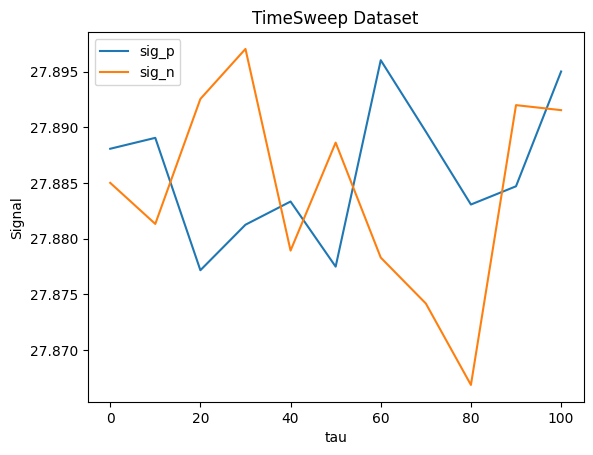

In [8]:
data = task_ts.get_dataset()
plt.plot(data['tau'], data['sig_p']*1e3, label='sig_p')
plt.plot(data['tau'], data['sig_n']*1e3, label='sig_n')
plt.xlabel('tau')
plt.ylabel('Signal')
plt.legend()
plt.title('TimeSweep Dataset')
plt.show()